# COMP 562 Final Project
#### By: Vidya Ramesh, Anita Murali, Soumya Mahavadi, Ximena Colopy
## Logistic Regression on Natural Disaster Tweets
This notebook uses a Logistic Regression model to classify tweets as either talking about a natural disaster, or not talking about a natural disaster. We then use 5 methods to measure how accurate the model is: F1 Score, Accuracy Score, a Confusion Matrix, AUC-ROC curve, and Precision-Recall Curve.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, auc, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target variable
X_train = train_df["text"]
y_train = train_df["target"]
X_test = test_df["text"]

=======F1 Score===========
0.7531172069825436
=======Accuracy Score===========
0.8049901510177282


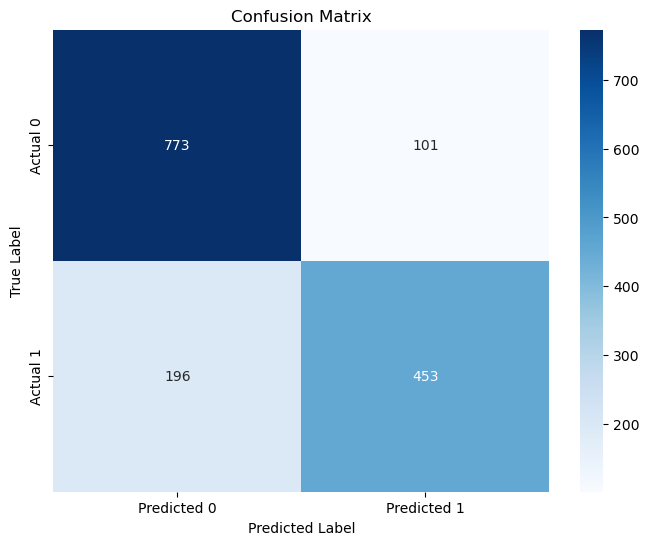

=======ROC AUC Score===========
0.8560794110284085


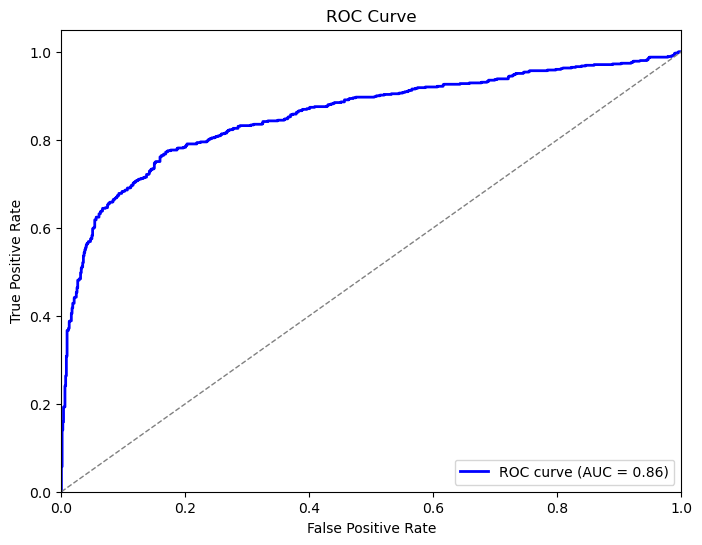

=======Average Precision Score===========
0.8514334970379465


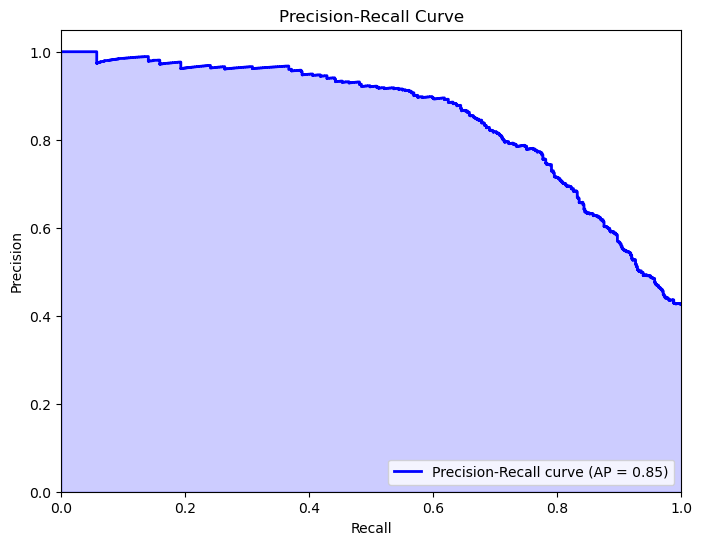

In [41]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize logistic regression classifier
classifier = LogisticRegression()

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Train the classifier
classifier.fit(X_train_split, y_train_split)

# Predict probabilities on the validation set
val_probabilities = classifier.predict_proba(X_val_split)[:, 1]

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
val_predictions = (val_probabilities > threshold).astype(int)

# Calculate F1 score and accuracy on the validation set
print("=======F1 Score===========")
f1 = f1_score(y_val_split, val_predictions)
accuracy = accuracy_score(y_val_split, val_predictions)
print(f1)

print("=======Accuracy Score===========")
print(accuracy)

# Make predictions on the test set
test_probabilities = classifier.predict_proba(X_test_tfidf)[:, 1]
test_predictions = (test_probabilities > threshold).astype(int)

# Generating confusion matrix
cm = confusion_matrix(y_val_split, val_predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities
y_probs = classifier.predict_proba(X_val_split)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val_split, y_probs)

print("=======ROC AUC Score===========")
auc_score = roc_auc_score(y_val_split, y_probs)
print(auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_val_split, y_probs)

# Compute average precision score
avg_precision = average_precision_score(y_val_split, y_probs)
print("=======Average Precision Score===========")
print(avg_precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', lw=2, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.fill_between(recall, precision, alpha=0.2, color='blue', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()
